In [ ]:
# import numpy as np
# import os
# import tensorflow as tf
# import shutil
# import random
# import cv2
# from PIL import Image
# from tensorflow import keras
# import matplotlib.pyplot as plt
# # from matplotlib import pyplot as plt
# # from google.colab import drive, files
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D, Dense, Add, Activation
# from tensorflow.keras.optimizers import Adam
# from keras.models import Model
# # from sklearn.metrics import classification_report, confusion_matrix
# from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
# from tensorflow.keras.preprocessing import image
# import scipy

In [ ]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [ ]:
from google.colab import drive
drive.mount('model_training')

Mounted at model_training


In [ ]:
# Path ke folder dataset
dataset_folder = os.path.join('/content/model_training/MyDrive/RISET_CNN/dataset/artis/rawdata_prepros')

# Path ke folder tempat Anda ingin menyimpan data pelatihan dan validasi
output_folder = os.path.join('/content/model_training/MyDrive/RISET_CNN/dataset/artis/dataset_prepros')
training_folder = os.path.join(output_folder, 'training')
validation_folder = os.path.join(output_folder, 'validation')

In [ ]:
def split_images(dataset_folder, training_folder, validation_folder):
    for npm_folder in os.listdir(dataset_folder):
        filename = os.listdir(os.path.join(dataset_folder, npm_folder))
        random.seed(42)
        random.shuffle(filename)
        train_ratio = int(0.8 * len(filename))
        train_filenames = filename[:train_ratio]
        val_filenames = filename[train_ratio:]
        for img in train_filenames:
            src_path = os.path.join(dataset_folder, npm_folder, img)
            dst_path = os.path.join(training_folder, npm_folder, img)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)
        for img in val_filenames:
            src_path = os.path.join(dataset_folder, npm_folder, img)
            dst_path = os.path.join(validation_folder, npm_folder, img)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path,dst_path)

In [ ]:
split_images(dataset_folder, training_folder, validation_folder)

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)
validate_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_data_gen.flow_from_directory(training_folder, target_size=(128,128), batch_size=32)
validate_gen = validate_data_gen.flow_from_directory(validation_folder, target_size=(128,128), batch_size=32)

Found 599 images belonging to 4 classes.
Found 152 images belonging to 4 classes.


In [ ]:
model = ResNet50(include_top=True,
                 weights=None,
                 input_shape=(128,128,3),
                 pooling=max,
                 classes=4)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
saveBestModel = tf.keras.callbacks.ModelCheckpoint('/content/model_training/MyDrive/RISET_CNN/ResNet50_BestModel_Kaggle2.h5',
                                                   monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
history = model.fit(train_gen,
                    steps_per_epoch=2,
                    epochs=300,
                    validation_data=validate_gen,
                    validation_steps=2,
                    callbacks=[saveBestModel]
                    )

Epoch 1/300
2/2 [==============================] - ETA: 0s - loss: 4.4664 - accuracy: 0.2500 
Epoch 1: val_accuracy improved from -inf to 0.26562, saving model to /content/model_training/MyDrive/RISET_CNN/ResNet50_BestModel_Kaggle.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 57s 23s/step - loss: 4.4664 - accuracy: 0.2500 - val_loss: 1.3746 - val_accuracy: 0.2656
Epoch 2/300
2/2 [==============================] - ETA: 0s - loss: 6.4725 - accuracy: 0.2545 
Epoch 2: val_accuracy improved from 0.26562 to 0.29688, saving model to /content/model_training/MyDrive/RISET_CNN/ResNet50_BestModel_Kaggle.h5
2/2 [==============================] - 27s 15s/step - loss: 6.4725 - accuracy: 0.2545 - val_loss: 1.3544 - val_accuracy: 0.2969
Epoch 3/300
2/2 [==============================] - ETA: 0s - loss: 4.9483 - accuracy: 0.1875 
Epoch 3: val_accuracy did not improve from 0.29688
2/2 [==============================] - 24s 13s/step - loss: 4.9483 - accuracy: 0.1875 - val_loss: 1.3950 - val_accuracy: 0.2500
Epoch 4/300
2/2 [==============================] - ETA: 0s - loss: 2.2203 - accuracy: 0.3281
Epoch 4: val_accuracy improved from 0.29688 to 0.35938, saving model to /content/model_training/MyDrive/RISET_CNN/ResNet50_BestModel_Kaggle.h

In [ ]:
best_model = keras.models.load_model('/content/model_training/MyDrive/RISET_CNN/ResNet50_BestModel_Kaggle.h5')

In [ ]:
loss, accuracy = best_model.evaluate(train_gen)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

19/19 [==============================] - 45s 2s/step - loss: 0.2737 - accuracy: 0.9082
Akurasi Model: 90.82%


In [ ]:
loss, accuracy = best_model.evaluate(validate_gen)
print(f'Akurasi Model: {accuracy * 100:.2f}%')

5/5 [==============================] - 10s 2s/step - loss: 0.3807 - accuracy: 0.8947
Akurasi Model: 89.47%


In [ ]:
data_test = os.path.join(output_folder, 'testing')

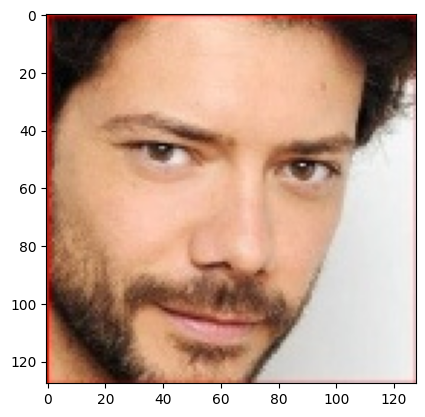

1/1 [==============================] - 0s 101ms/step
['Adriana Lima']


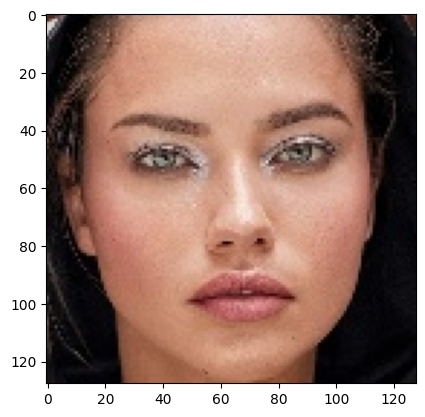

1/1 [==============================] - 0s 98ms/step
['Adriana Lima']


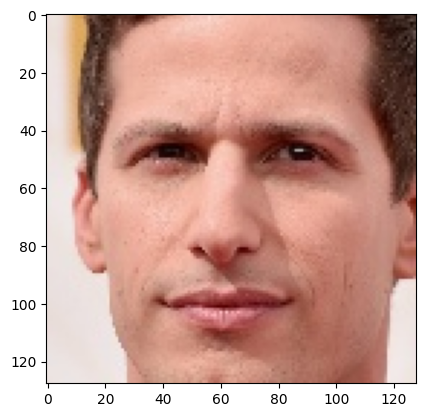

1/1 [==============================] - 0s 100ms/step
['Adriana Lima']


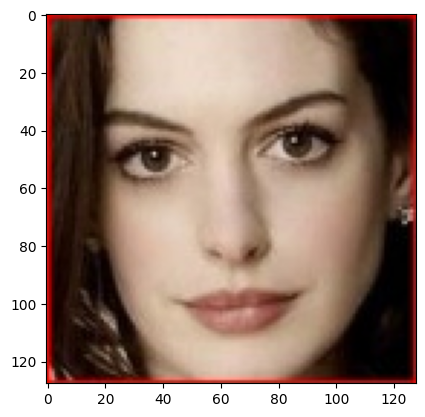

1/1 [==============================] - 0s 101ms/step
['Adriana Lima']


In [ ]:
for filename in os.listdir(data_test):
  image_path = os.path.join(data_test, filename)
  img = image.load_img(image_path, target_size=(128,128))
#   if img.mode == 'RGBA':
#     img = img.convert('RGB')
  plt.imshow(img)
  plt.show()

#   test_data_gen = ImageDataGenerator(rescale=1.0/255)  # Sesuaikan dengan prapemrosesan yang Anda gunakan saat melatih model

# # Memuat data pengujian
#   test_gen = test_data_gen.flow_from_directory(
#       data_test,
#       target_size=(128,128),  # Sesuaikan dengan ukuran masukan model Anda
#       batch_size=32,
#       class_mode=None,  # Data pengujian tidak memiliki label kelas
#       shuffle=False  # Pastikan untuk tidak mengacak urutan data
#   )

# # Melakukan prediksi pada data pengujian
#   predictions = model.predict(test_generator)

  x = image.img_to_array(img)
  x = tf.keras.applications.resnet.preprocess_input(x)
  x = np.expand_dims(x, axis=0)
  # x = preprocess_input(x)
  img = np.vstack([x])

  predictions = best_model.predict(img)

  predictions = np.argmax(predictions, axis=1)

  labels = (train_gen.class_indices)
  labels = dict((i,j) for j,i in labels.items())

  predictions = [labels[i] for i in predictions]
  print(predictions)